In [4]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "/Users/ugurcetin/Desktop/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [8]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [10]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


---

### Prepare the Data

In [14]:
 df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# NUMERIC
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols, index=df.index) # use coin_id as index
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [18]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Use the existing df DataFrame
features = df.copy()  # df already has 'coin_id' as index, so no need to drop it

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=df.index)

# Display the scaled DataFrame
scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.795492,0.511302,0.583375,0.241469,0.155180,0.037656,0.007000
ethereum,0.748674,0.615021,0.541708,0.198501,0.119205,0.083994,0.015188
tether,0.724956,0.229343,0.428446,0.197509,0.168365,0.000174,0.002235
ripple,0.715894,0.204758,0.481360,0.199087,0.101797,0.017920,0.000123
bitcoin-cash,0.894683,0.865714,0.776267,0.287488,0.116111,0.009896,0.004074


---

### Find the Best Value for k Using the Original Scaled DataFrame.

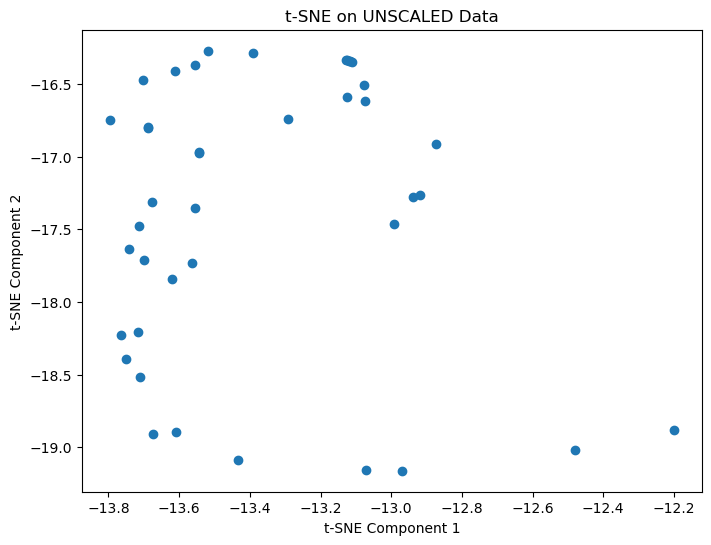

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ensure num_cols contains only numerical feature column names
num_cols = df.columns  # Assuming df already contains only numerical features

# Apply t-SNE on UNSCALED data (original df)
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df[num_cols]), index=df.index)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("t-SNE on UNSCALED Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


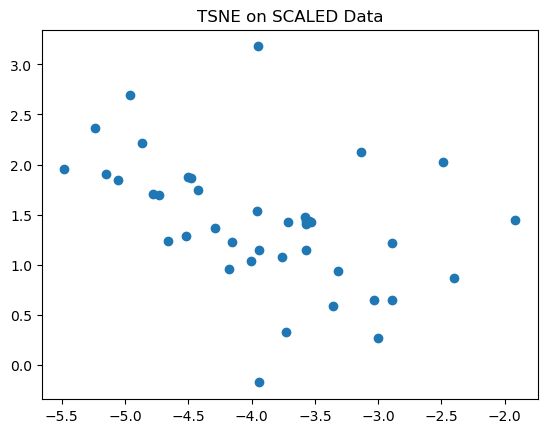

In [24]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [24]:
# Hypothesis: Scaled data is better
# No clear cut clusters....

# Check for Multicollinearity

In [26]:
# Correlations
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


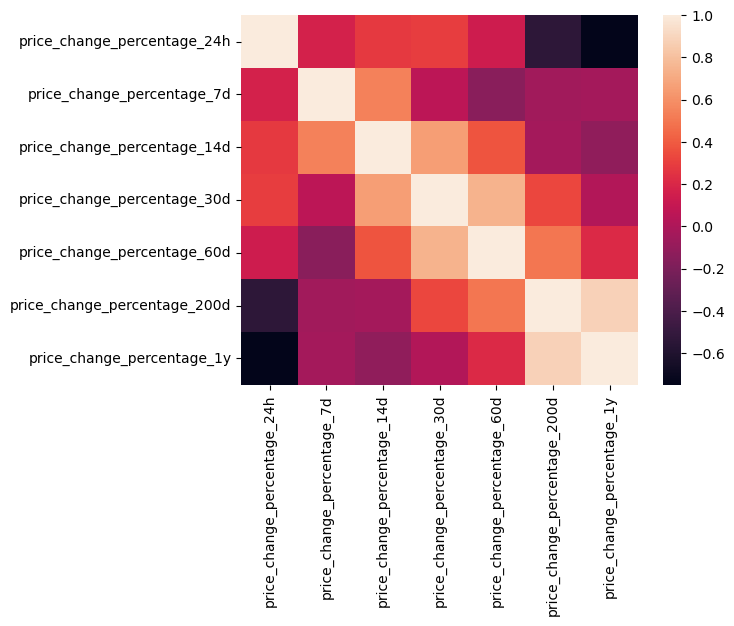

In [28]:
sns.heatmap(corrs)
plt.show()

In [ ]:
# WE HAVE MULTICOLLINEARITY
# THIS MEANS THAT WE CAN REDUCE OUR FEATURE SET BY USING PRINCIPAL COMPONENTS

# Clustering on Scaled Data

In [30]:
# Define your "X" - features to predict
X = df_scaled

In [32]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


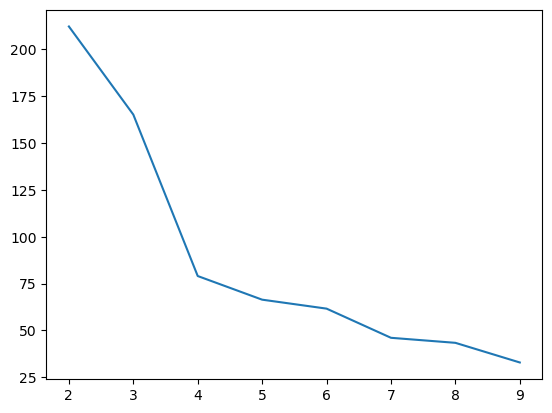

In [34]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

In [ ]:
# Elbow plot says 4, SS and VRC support that. Looks like 5 could also work

In [36]:
# Agglomerative

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151


In [38]:
# 4 is pretty good

In [40]:
# BIRCH

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.336476,27.695263
4,6,0.185448,29.126884
5,7,0.193982,29.159036
6,8,0.197678,28.717616
7,9,0.194521,27.594528


In [ ]:
# Kmeans of 4 is the best

In [42]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


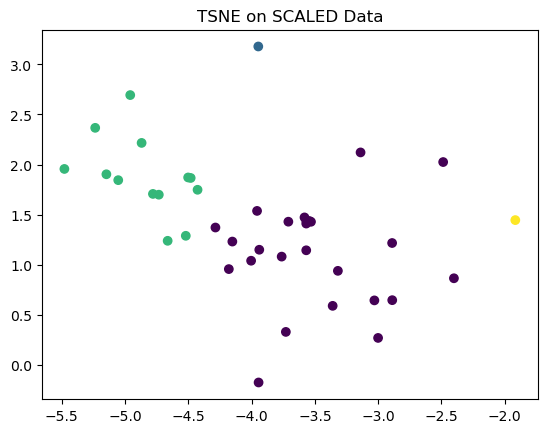

In [44]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

In [46]:
df_sub.loc[df_sub.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


# PCA

In [48]:
# We have multi-collinearity (we are afflicted)

# Init PCA
n_components = len(df_scaled.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


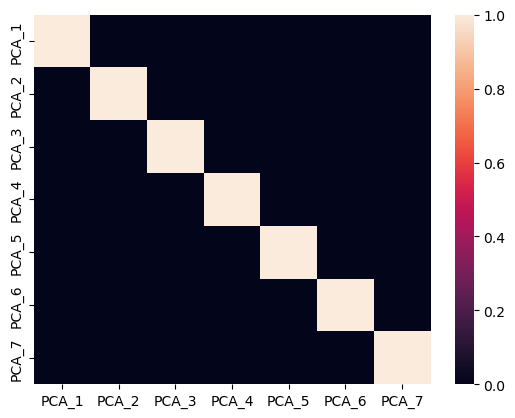

In [52]:
# sanity check
corrs = df_pca.corr()
sns.heatmap(corrs)
plt.show()

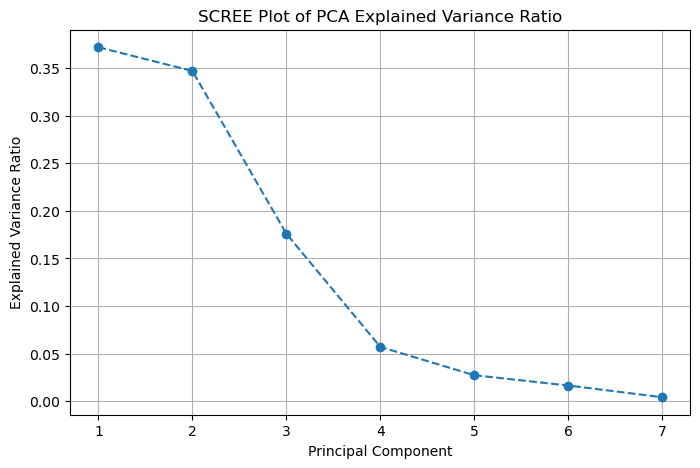

In [54]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [56]:
sum(pca.explained_variance_ratio_[0:3]) # 10 components make up 96% of the variance

0.895031657030984

In [58]:
df_pca = df_pca.loc[:, ["PCA_1", "PCA_2", "PCA_3"]]
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


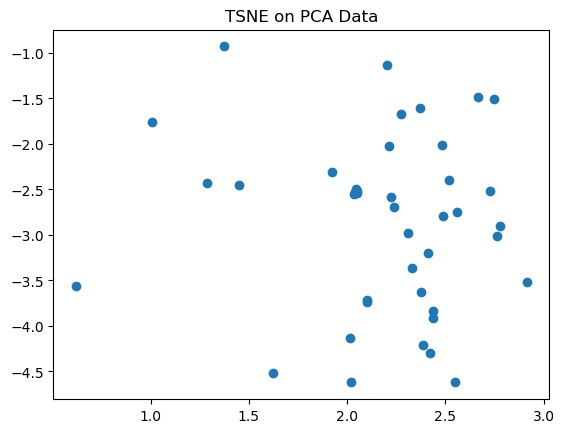

In [60]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on PCA Data")
plt.show()

In [62]:
# Do Unsupervised Clustering

# KMeans on PCA DATA

# Define your "X" - features to predict
X = df_pca

In [64]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734


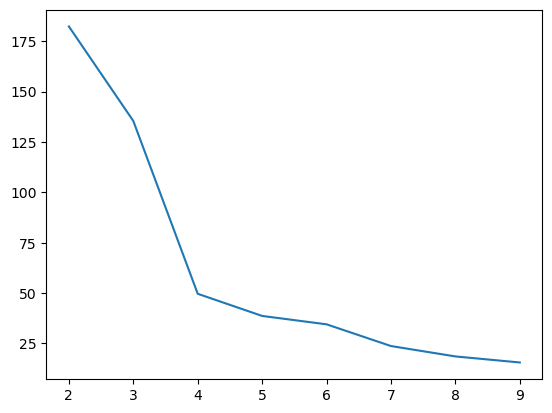

In [66]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

In [68]:
# Agglomerative

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.744060,21.616483
1,3,0.741509,33.046144
2,4,0.426017,50.360119
3,5,0.359902,51.722281
4,6,0.369307,57.525342
5,7,0.362977,59.592919
6,8,0.309600,64.445060
7,9,0.323252,68.979059


In [35]:
# Kmeans of 4 is still good?

In [70]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2


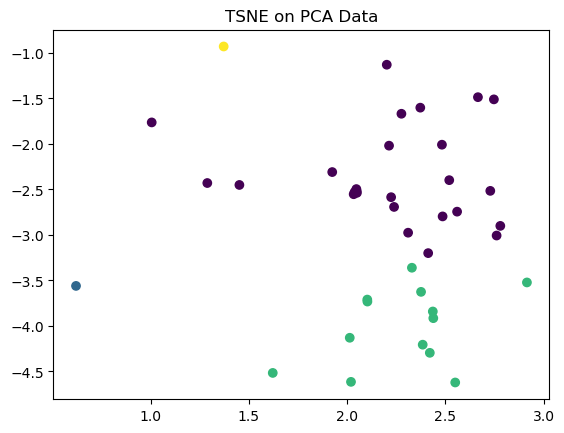

In [72]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on PCA Data")
plt.show()

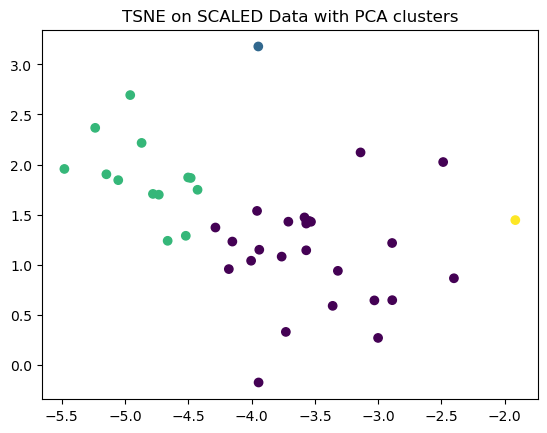

In [74]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data with PCA clusters")
plt.show()

In [42]:
# Stick with the UNPCA clusters, since there is no difference in the ouput clusters

In [76]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  # range(1, 12) generates numbers from 1 to 11

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [78]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    model.fit(df_scaled)
    
    # Append the inertia to the list
    inertia.append(model.inertia_)

# Display the inertia values
print(inertia)



[287.0, 212.1233420748626, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.1161984214092]


In [80]:
# Sample data for k and inertia
k_values = list(range(1, 11))  # Example k values from 1 to 10
inertia_values = [300, 250, 200, 180, 170, 160, 150, 145, 140, 138]  # Example inertia values

# Create a dictionary with the data
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)


    k  inertia
0   1      300
1   2      250
2   3      200
3   4      180
4   5      170
5   6      160
6   7      150
7   8      145
8   9      140
9  10      138


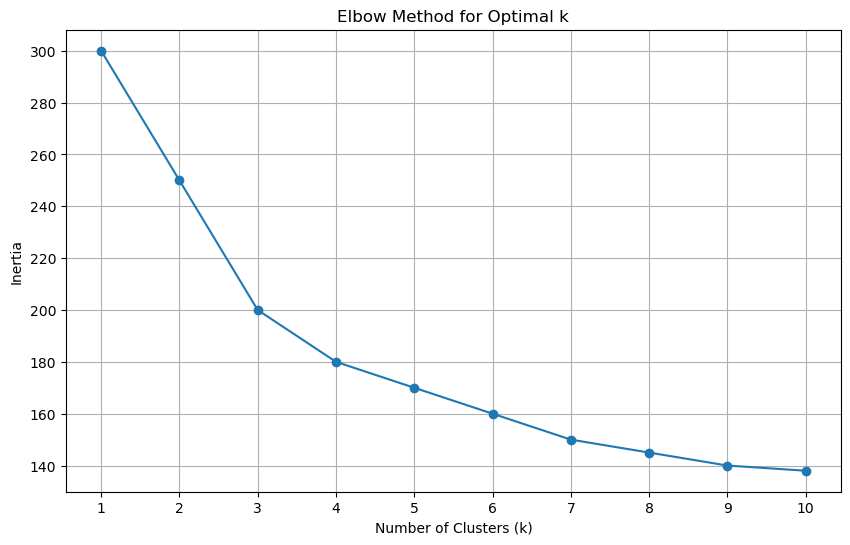

In [82]:
import matplotlib.pyplot as plt

# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Set x-ticks to be the k values
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** In the given plot, the sharpest drop in inertia occurs between ( k=1 ) and ( k=3 ). After ( k=3 ), the rate of decrease in inertia slows down significantly. The most noticeable "elbow" appears around ( k=3 ) or ( k=4 ). While both ( k=3 ) and ( k=4 ) are reasonable choices for the optimal number of clusters, ( k=3 ) seems to be the strongest candidate based on the graph's curvature.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [84]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Step 1: Initialize the K-Means model using the best value for k
optimal_k = 3  # Replace this with your determined optimal k value
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

# Print the model to confirm initialization
print(kmeans_model)


KMeans(n_clusters=3, random_state=0)


In [98]:
# Fit the K-Means model using the scaled DataFrame
from sklearn.cluster import KMeans

# Assuming 'scaled_df' is your scaled DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Get the cluster labels
cluster_labels = kmeans.labels_


In [100]:
# Predict the clusters for the scaled data
predicted_clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values
print(predicted_clusters)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 0 2 2]


In [102]:
# Create a copy of the scaled DataFrame
scaled_df_copy = scaled_df.copy()


In [104]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_copy["Cluster"] = predicted_clusters

# Display the copy of the scaled DataFrame
print(scaled_df_copy)



                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.795492                    0.511302   
ethereum                                 0.748674                    0.615021   
tether                                   0.724956                    0.229343   
ripple                                   0.715894                    0.204758   
bitcoin-cash                             0.894683                    0.865714   
binancecoin                              0.851041                    0.707364   
chainlink                                0.723452                    1.000000   
cardano                                  0.736658                    0.749840   
litecoin                                 0.733031                    0.473952   
bitcoin-cash-sv                          0.786858                    0.350551   
crypto-com-chain            

In [106]:
import hvplot.pandas  

# Create a scatter plot
scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"]  # Replace "coin_id" with the actual column name for crypto names if different
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [108]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

print(pca)

PCA(n_components=3)


In [114]:
# Apply PCA to reduce dimensions
pca_data = pca.fit_transform(scaled_df)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Display the scaled PCA data
print(pca_df)



         PC1       PC2       PC3
0  -0.214772 -0.025405 -0.005481
1  -0.220095 -0.022215  0.123765
2   0.078709 -0.094877 -0.137882
3   0.074947 -0.101638 -0.124897
4  -0.599733 -0.004714  0.152545
5  -0.355517  0.049420  0.055719
6  -0.473340  0.019261  0.463127
7  -0.315648  0.015901  0.215385
8  -0.176463 -0.066224  0.019995
9   0.014840 -0.144602 -0.039226
10  0.380197 -0.144815 -0.167533
11  0.082646 -0.096239 -0.141796
12  0.107148 -0.152231 -0.119805
13 -0.608450  0.231165  0.040722
14 -0.017262 -0.058728 -0.018014
15 -0.121773 -0.151377  0.184345
16  0.321196 -0.111484 -0.147198
17  0.085402 -0.136136  0.002815
18 -0.358098  0.019354  0.258218
19  0.072282 -0.101909 -0.142566
20  0.188129 -0.124189 -0.025629
21 -0.209484 -0.027035 -0.009201
22  0.208040 -0.140668 -0.143983
23  0.047640 -0.087650 -0.081364
24  0.080959  0.135339 -0.252855
25  0.076385 -0.095839 -0.139904
26 -0.000790 -0.157956  0.074085
27  0.411198 -0.237260 -0.026029
28 -0.233635 -0.026302  0.127410
29  0.4257

In [116]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print(explained_variance)



[0.35455511 0.33541836 0.21389153]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.903865002746618

In [118]:
# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the result
print(total_explained_variance)


0.903865002746618


In [120]:
print(scaled_df_copy.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


In [122]:
print(df.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [124]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Assign coin_id from the original DataFrame's index
pca_df["coin_id"] = df.index

# Set coin_id as the index
pca_df.set_index("coin_id", inplace=True)

# Display the result
print(pca_df)




                           PC1       PC2       PC3
coin_id                                           
bitcoin              -0.214772 -0.025405 -0.005481
ethereum             -0.220095 -0.022215  0.123765
tether                0.078709 -0.094877 -0.137882
ripple                0.074947 -0.101638 -0.124897
bitcoin-cash         -0.599733 -0.004714  0.152545
binancecoin          -0.355517  0.049420  0.055719
chainlink            -0.473340  0.019261  0.463127
cardano              -0.315648  0.015901  0.215385
litecoin             -0.176463 -0.066224  0.019995
bitcoin-cash-sv       0.014840 -0.144602 -0.039226
crypto-com-chain      0.380197 -0.144815 -0.167533
usd-coin              0.082646 -0.096239 -0.141796
eos                   0.107148 -0.152231 -0.119805
monero               -0.608450  0.231165  0.040722
tron                 -0.017262 -0.058728 -0.018014
tezos                -0.121773 -0.151377  0.184345
okb                   0.321196 -0.111484 -0.147198
stellar               0.085402 

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


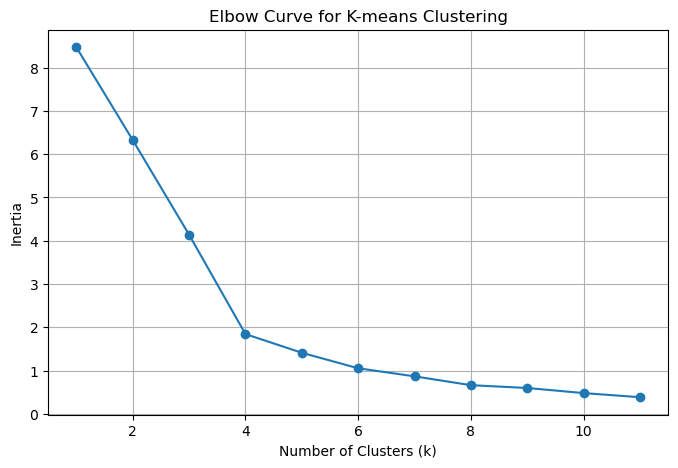

In [126]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Loop through each k and fit a KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for K-means Clustering")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The original k=3 and but this time we have k=4. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k


In [128]:
# Fit the K-Means model using the PCA data
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k (e.g., 4)
k = 4
model = KMeans(n_clusters=k, random_state=1)

# Fit the model to the scaled PCA data
model.fit(pca_df)

# Add the predicted clusters to the DataFrame
pca_df['Clusters'] = model.labels_

# Display the resulting DataFrame with clusters
pca_df.head()



,PC1,PC2,PC3,Clusters
coin_id,,,,
bitcoin,-0.214772,-0.025405,-0.005481,1
ethereum,-0.220095,-0.022215,0.123765,1
tether,0.078709,-0.094877,-0.137882,0
ripple,0.074947,-0.101638,-0.124897,0
bitcoin-cash,-0.599733,-0.004714,0.152545,1


In [130]:
# Predict the clusters using the K-Means model
predicted_clusters = model.predict(pca_df.drop('Clusters', axis=1))

# Print the resulting array of cluster values
print(predicted_clusters)



[1 1 0 0 1 1 1 1 0 0 2 0 0 1 0 0 2 0 1 0 0 1 2 0 0 0 0 2 1 2 0 0 3 0 2 0 1
 2 0 0 0]


In [132]:
# Create a copy of the scaled PCA DataFrame
clustered_df = pca_df.copy()

# Add a new column with the predicted clusters (if not already added)
clustered_df['Predicted_Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
clustered_df.head()



,PC1,PC2,PC3,Clusters,Predicted_Cluster
coin_id,,,,,
bitcoin,-0.214772,-0.025405,-0.005481,1,1
ethereum,-0.220095,-0.022215,0.123765,1,1
tether,0.078709,-0.094877,-0.137882,0,0
ripple,0.074947,-0.101638,-0.124897,0,0
bitcoin-cash,-0.599733,-0.004714,0.152545,1,1


In [134]:
import hvplot.pandas

# Make sure 'coin_id' or crypto name column is included in clustered_df
# If it's not already merged, you may need to merge it with your original DataFrame

# Create a scatter plot with PC1 and PC2, colored by cluster
clustered_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Predicted_Cluster',
    hover_cols=['coin_id'],  # Replace 'coin_id' with the correct column name for crypto names if different
    title='Cryptocurrency Clusters (K-Means)',
    width=700,
    height=500
)



:NdOverlay   [Predicted_Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [138]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

inertia_scaled = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_data)
    inertia_scaled.append(model.inertia_)

inertia_pca = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(pca_df)
    inertia_pca.append(model.inertia_)


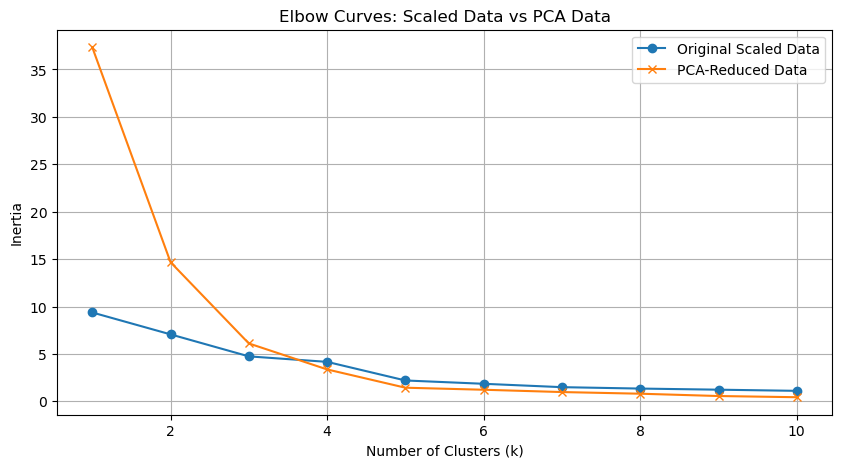

In [140]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you've already calculated the inertia values for both datasets:
# - inertia_scaled: list of inertia values from the original scaled data
# - inertia_pca: list of inertia values from the PCA data
# - k_values: list of k values used (e.g., range(1, 11))

k_values = list(range(1, 11))  # Example range, adjust if needed

# Plotting both elbow curves
plt.figure(figsize=(10, 5))

plt.plot(k_values, inertia_scaled, marker='o', label='Original Scaled Data')
plt.plot(k_values, inertia_pca, marker='x', label='PCA-Reduced Data')

plt.title('Elbow Curves: Scaled Data vs PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()


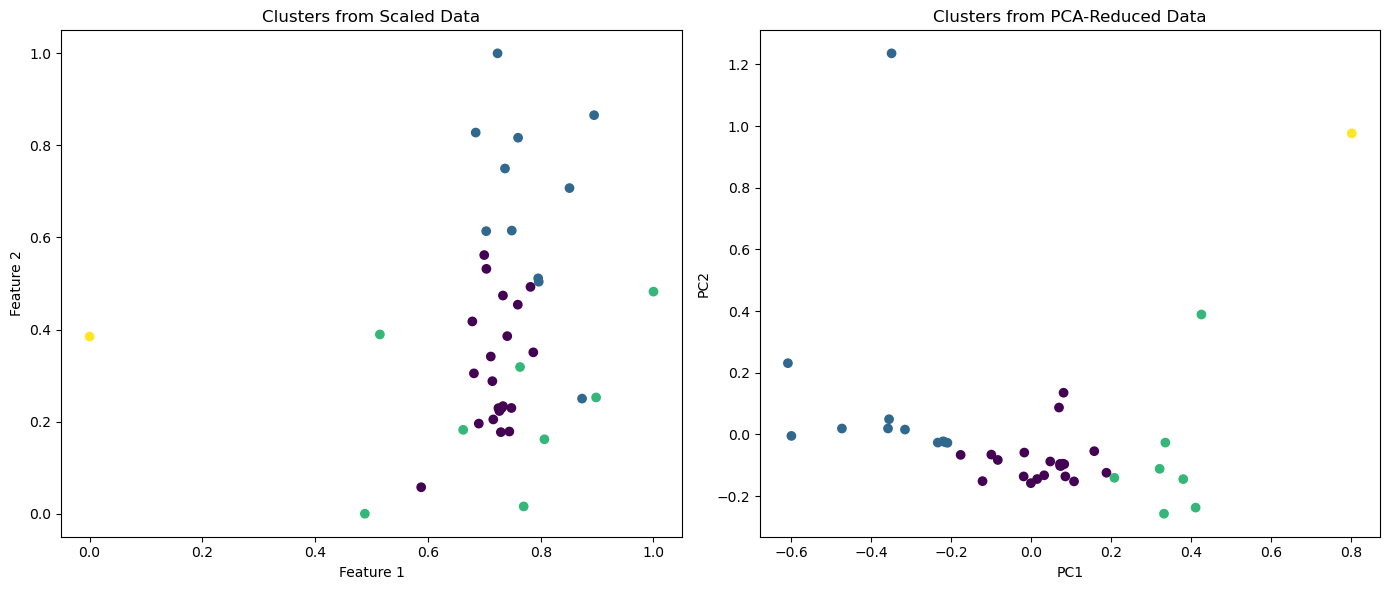

In [144]:
import matplotlib.pyplot as plt

# Plot clusters from scaled data
plt.figure(figsize=(14, 6))

# Subplot 1: Scaled Data
plt.subplot(1, 2, 1)
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=clustered_scaled_df['Cluster'], cmap='viridis')
plt.title('Clusters from Scaled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: PCA Data
plt.subplot(1, 2, 2)
plt.scatter(clustered_df['PC1'], clustered_df['PC2'], c=clustered_df['Predicted_Cluster'], cmap='viridis')
plt.title('Clusters from PCA-Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplification makes the data more visually interpretable and reveals clearer cluster boundaries. The PCA-reduced data, which condenses the most important variance into just two components, often results in tighter, more distinct clusters when visualized. While some nuance from the original dataset may be lost, the dimensionality reduction helps remove noise and redundant information, improving clustering performance in terms of visual clarity and potentially convergence speed. However, depending on the dataset, it may also obscure subtle patterns present in the full feature set. Overall, PCA enhances interpretability without severely compromising the clustering structure.